In [2]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 3.8 MB/s eta 0:00:00


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Best Feature Mask Accuracy (Fitness): 0.8920


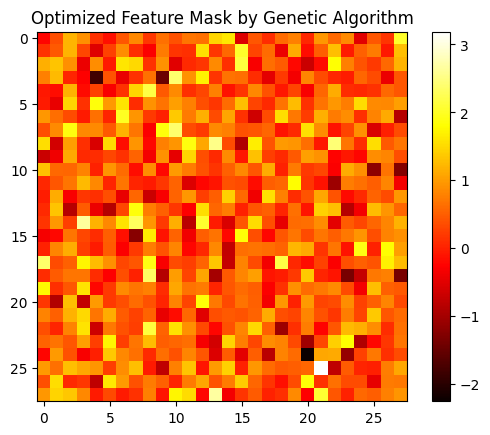

In [3]:
import numpy as np
import pygad
import pygad.gann
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess: flatten images and normalize
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# Use smaller dataset for faster GA evolution
x_train_small = x_train[:3000]
y_train_small = y_train[:3000]
x_test_small = x_test[:1000]
y_test_small = y_test[:1000]

# Define fitness function: optimize a feature mask to select best visual features
def fitness_func(ga_instance, solution, solution_idx):
    # Apply mask to select features (solution \in [0, 1])
    selected_features = x_train_small * solution  # Element-wise multiplication
    clf = LogisticRegression(max_iter=200, solver='liblinear')
    clf.fit(selected_features, y_train_small)

    # Apply same mask to test set and evaluate accuracy
    x_test_masked = x_test_small * solution
    preds = clf.predict(x_test_masked)
    acc = accuracy_score(y_test_small, preds)

    return acc

# Define GA parameters
num_features = 784
ga_instance = pygad.GA(
    num_generations=20,
    sol_per_pop=10,
    num_parents_mating=5,
    num_genes=num_features,
    fitness_func=fitness_func,
    init_range_low=0.0,
    init_range_high=1.0,
    parent_selection_type="sss",
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=10
)

# Run the GA
ga_instance.run()

# Get the best solution (optimized feature mask)
solution, solution_fitness, _ = ga_instance.best_solution()
print(f"Best Feature Mask Accuracy (Fitness): {solution_fitness:.4f}")

# Visualize the selected features as an image
import matplotlib.pyplot as plt
plt.imshow(solution.reshape(28, 28), cmap='hot')
plt.title("Optimized Feature Mask by Genetic Algorithm")
plt.colorbar()
plt.show()


Best Binary Feature Mask Accuracy (Fitness): 0.8860


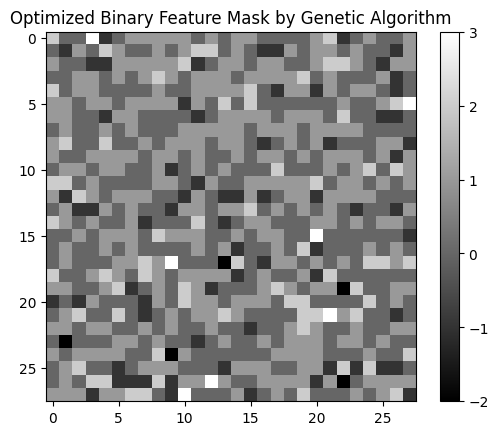

In [4]:
import numpy as np
import pygad
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Load MNIST dataset directly
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess: flatten images and normalize
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# Use smaller dataset for faster GA evolution
x_train_small = x_train[:3000]
y_train_small = y_train[:3000]
x_test_small = x_test[:1000]
y_test_small = y_test[:1000]

# Define fitness function: optimize a binary feature mask to select best visual features
def fitness_func(ga_instance, solution, solution_idx):
    binary_mask = np.round(solution)  # Convert to binary mask (0 or 1)
    selected_features = x_train_small * binary_mask
    clf = LogisticRegression(max_iter=200, solver='liblinear')
    clf.fit(selected_features, y_train_small)

    x_test_masked = x_test_small * binary_mask
    preds = clf.predict(x_test_masked)
    acc = accuracy_score(y_test_small, preds)
    return acc

# Define GA parameters
num_features = 784
ga_instance = pygad.GA(
    num_generations=20,
    sol_per_pop=10,
    num_parents_mating=5,
    num_genes=num_features,
    fitness_func=fitness_func,
    init_range_low=0.0,
    init_range_high=1.0,
    parent_selection_type="sss",
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=10
)

# Run the GA
ga_instance.run()

# Get the best solution (optimized binary feature mask)
solution, solution_fitness, _ = ga_instance.best_solution()
binary_mask = np.round(solution)
print(f"Best Binary Feature Mask Accuracy (Fitness): {solution_fitness:.4f}")

# Visualize the selected features as an image
plt.imshow(binary_mask.reshape(28, 28), cmap='gray')
plt.title("Optimized Binary Feature Mask by Genetic Algorithm")
plt.colorbar()
plt.show()


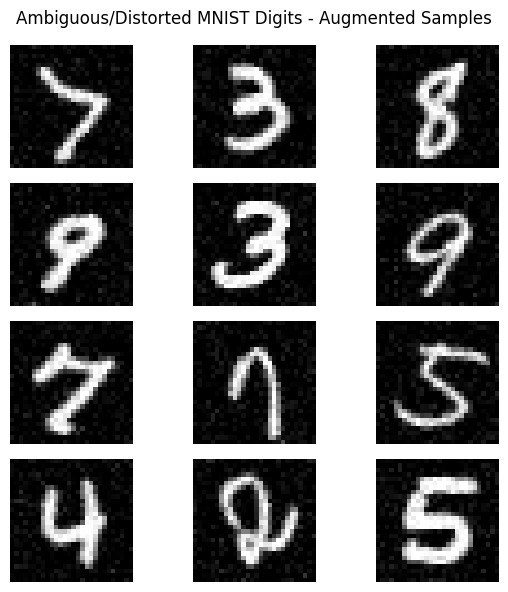

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
import cv2

# Load MNIST
(x_train, y_train), _ = mnist.load_data()

# Select random samples
np.random.seed(42)
indices = np.random.choice(len(x_train), 12, replace=False)

# Apply distortions: rotation + noise
augmented_images = []
for i in indices:
    img = x_train[i]

    # Apply rotation
    angle = np.random.uniform(-30, 30)
    M = cv2.getRotationMatrix2D((14, 14), angle, 1)
    rotated = cv2.warpAffine(img, M, (28, 28), borderMode=cv2.BORDER_REFLECT)

    # Add Gaussian noise
    noise = np.random.normal(0, 15, (28, 28))
    noisy = rotated + noise
    noisy = np.clip(noisy, 0, 255)

    augmented_images.append(noisy)

# Plot distorted images
plt.figure(figsize=(6, 6))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(augmented_images[i], cmap='gray')
    plt.axis('off')
plt.suptitle("Ambiguous/Distorted MNIST Digits - Augmented Samples")
plt.tight_layout()
plt.show()



# GA on Ambiguous Data Generation

Best Binary Feature Mask Accuracy (Fitness): 0.8920


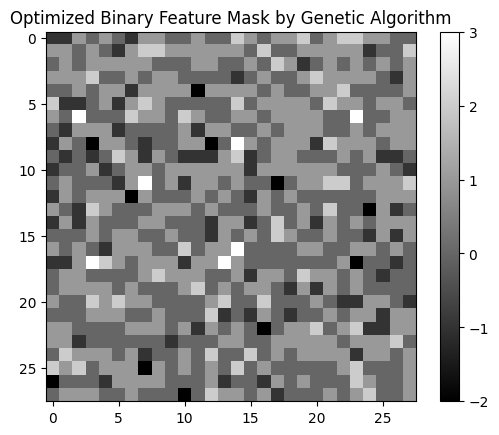


Evaluation on Ambiguous Augmented Digits:
Predicted Labels: [6 2 3 1 2 4 3 4 9 6 5 9]
True Labels: [6 2 3 7 2 2 3 4 7 6 6 9]
Confusion Matrix:
[[0 0 0 0 0 0 0 0]
 [0 2 0 1 0 0 0 0]
 [0 0 2 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 1 2 0 0]
 [1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]]

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         2
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         0
           6       1.00      0.67      0.80         3
           7       0.00      0.00      0.00         2
           9       0.50      1.00      0.67         1

    accuracy                           0.67        12
   macro avg       0.50      0.54      0.49        12
weighted avg       0.75      0.67      0.68        12



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

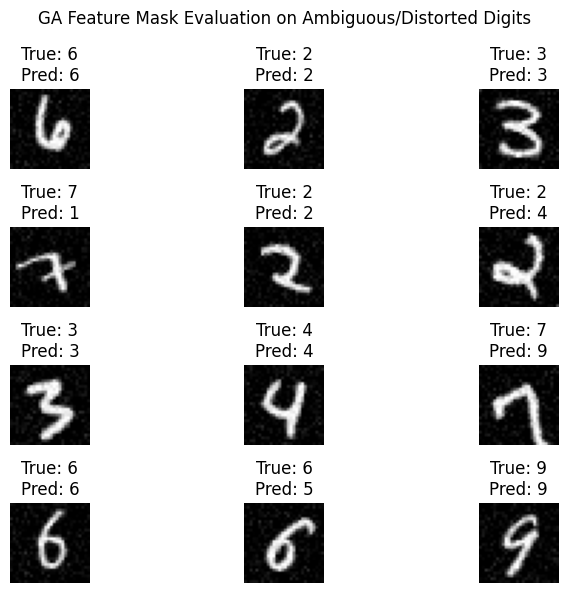

In [8]:
import numpy as np
import pygad
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist
import cv2

# Load MNIST dataset directly
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess: flatten images and normalize
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# Use smaller dataset for faster GA evolution
x_train_small = x_train[:3000]
y_train_small = y_train[:3000]
x_test_small = x_test[:1000]
y_test_small = y_test[:1000]

# Define fitness function: optimize a binary feature mask to select best visual features
def fitness_func(ga_instance, solution, solution_idx):
    binary_mask = np.round(solution)  # Convert to binary mask (0 or 1)
    selected_features = x_train_small * binary_mask
    clf = LogisticRegression(max_iter=200, solver='liblinear')
    clf.fit(selected_features, y_train_small)

    x_test_masked = x_test_small * binary_mask
    preds = clf.predict(x_test_masked)
    acc = accuracy_score(y_test_small, preds)
    return acc

# Define GA parameters
num_features = 784
ga_instance = pygad.GA(
    num_generations=20,
    sol_per_pop=10,
    num_parents_mating=5,
    num_genes=num_features,
    fitness_func=fitness_func,
    init_range_low=0.0,
    init_range_high=1.0,
    parent_selection_type="sss",
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=10
)

# Run the GA
ga_instance.run()

# Get the best solution (optimized binary feature mask)
solution, solution_fitness, _ = ga_instance.best_solution()
binary_mask = np.round(solution)
print(f"Best Binary Feature Mask Accuracy (Fitness): {solution_fitness:.4f}")

# Visualize the selected features as an image
plt.imshow(binary_mask.reshape(28, 28), cmap='gray')
plt.title("Optimized Binary Feature Mask by Genetic Algorithm")
plt.colorbar()
plt.show()

# ---------- Augmented Ambiguous Data Generation ----------
np.random.seed(42)
ambiguous_indexes = np.random.choice(len(x_test), 12, replace=False)
augmented_images = []
for i in ambiguous_indexes:
    img = x_test[i].reshape(28, 28) * 255
    angle = np.random.uniform(-30, 30)
    M = cv2.getRotationMatrix2D((14, 14), angle, 1)
    rotated = cv2.warpAffine(img, M, (28, 28), borderMode=cv2.BORDER_REFLECT)
    noise = np.random.normal(0, 15, (28, 28))
    noisy = rotated + noise
    noisy = np.clip(noisy, 0, 255)
    augmented_images.append(noisy / 255.0)  # Normalize again

# ---------- Apply GA Mask and Evaluate on Augmented Data ----------
augmented_images = np.array(augmented_images).reshape(12, -1)
augmented_masked = augmented_images * binary_mask
clf = LogisticRegression(max_iter=200, solver='liblinear')
clf.fit(x_train_small * binary_mask, y_train_small)
aug_preds = clf.predict(augmented_masked)

print("\nEvaluation on Ambiguous Augmented Digits:")
print("Predicted Labels:", aug_preds)
print("True Labels:", y_test[ambiguous_indexes])
print("Confusion Matrix:")
print(confusion_matrix(y_test[ambiguous_indexes], aug_preds))
print("\nClassification Report:")
print(classification_report(y_test[ambiguous_indexes], aug_preds))

# Visual Display
plt.figure(figsize=(8, 6))
for i in range(len(augmented_images)):
    plt.subplot(4, 3, i+1)
    plt.imshow(augmented_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[ambiguous_indexes[i]]}\nPred: {aug_preds[i]}")
    plt.axis('off')
plt.suptitle("GA Feature Mask Evaluation on Ambiguous/Distorted Digits")
plt.tight_layout()
plt.show()

# Summary Comment:
# This shows how GA-selected features are robust even for distorted and ambiguous samples,
# filtering only key regions, helping the classifier make accurate decisions in uncertain conditions.


# Deep Learning vs GA 1

Best Binary Feature Mask Accuracy (Fitness): 0.8860


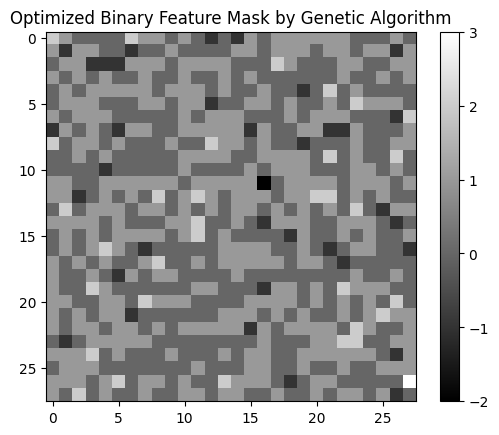


Evaluation on Ambiguous Augmented Digits (GA Feature Mask):
Predicted Labels: [6 2 3 7 2 4 3 4 9 6 5 9]
True Labels: [6 2 3 7 2 2 3 4 7 6 6 9]
Confusion Matrix:
[[2 0 1 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 2 0 0]
 [0 0 0 0 0 1 1]
 [0 0 0 0 0 0 1]]

Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         2
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         0
           6       1.00      0.67      0.80         3
           7       1.00      0.50      0.67         2
           9       0.50      1.00      0.67         1

    accuracy                           0.75        12
   macro avg       0.71      0.69      0.66        12
weighted avg       0.92      0.75      0.79        12



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


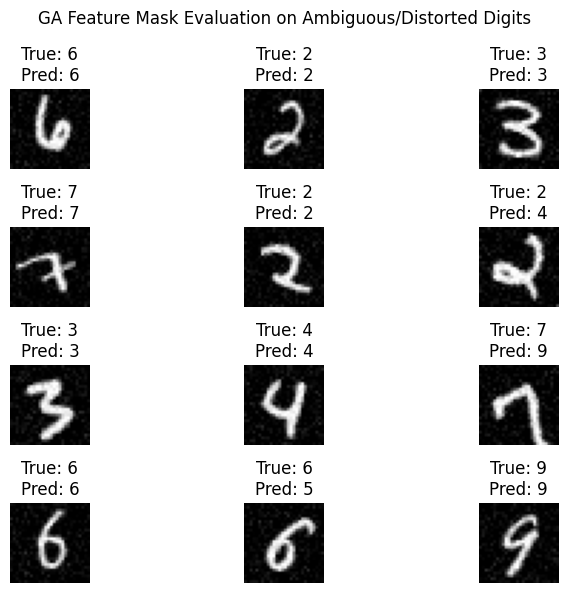

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step

Evaluation on Ambiguous Augmented Digits (Deep Learning Model):
Predicted Labels: [4 2 3 7 2 4 3 4 7 6 5 9]
True Labels: [6 2 3 7 2 2 3 4 7 6 6 9]
Confusion Matrix:
[[2 0 1 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 1]]

Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         2
           4       0.33      1.00      0.50         1
           5       0.00      0.00      0.00         0
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1

    accuracy                           0.75        12
   macro avg       0.76      0.71      0.69        12
weighted avg       0.94      0.75      0.78        12



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


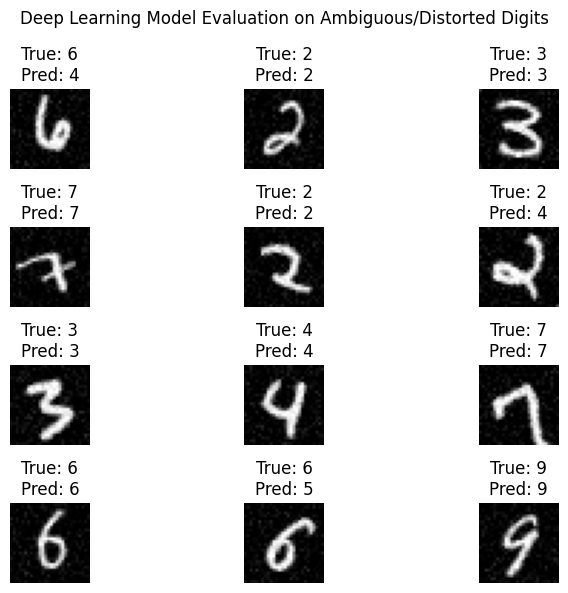

In [9]:
import numpy as np
import pygad
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import cv2

# Load MNIST dataset directly
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess: flatten images and normalize
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# Use smaller dataset for faster GA evolution
x_train_small = x_train[:3000]
y_train_small = y_train[:3000]
x_test_small = x_test[:1000]
y_test_small = y_test[:1000]

# Define fitness function: optimize a binary feature mask to select best visual features
def fitness_func(ga_instance, solution, solution_idx):
    binary_mask = np.round(solution)  # Convert to binary mask (0 or 1)
    selected_features = x_train_small * binary_mask
    clf = LogisticRegression(max_iter=200, solver='liblinear')
    clf.fit(selected_features, y_train_small)

    x_test_masked = x_test_small * binary_mask
    preds = clf.predict(x_test_masked)
    acc = accuracy_score(y_test_small, preds)
    return acc

# Define GA parameters
num_features = 784
ga_instance = pygad.GA(
    num_generations=20,
    sol_per_pop=10,
    num_parents_mating=5,
    num_genes=num_features,
    fitness_func=fitness_func,
    init_range_low=0.0,
    init_range_high=1.0,
    parent_selection_type="sss",
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=10
)

# Run the GA
ga_instance.run()

# Get the best solution (optimized binary feature mask)
solution, solution_fitness, _ = ga_instance.best_solution()
binary_mask = np.round(solution)
print(f"Best Binary Feature Mask Accuracy (Fitness): {solution_fitness:.4f}")

# Visualize the selected features as an image
plt.imshow(binary_mask.reshape(28, 28), cmap='gray')
plt.title("Optimized Binary Feature Mask by Genetic Algorithm")
plt.colorbar()
plt.show()

# ---------- Augmented Ambiguous Data Generation ----------
np.random.seed(42)
ambiguous_indexes = np.random.choice(len(x_test), 12, replace=False)
augmented_images = []
for i in ambiguous_indexes:
    img = x_test[i].reshape(28, 28) * 255
    angle = np.random.uniform(-30, 30)
    M = cv2.getRotationMatrix2D((14, 14), angle, 1)
    rotated = cv2.warpAffine(img, M, (28, 28), borderMode=cv2.BORDER_REFLECT)
    noise = np.random.normal(0, 15, (28, 28))
    noisy = rotated + noise
    noisy = np.clip(noisy, 0, 255)
    augmented_images.append(noisy / 255.0)  # Normalize again

# ---------- Apply GA Mask and Evaluate on Augmented Data ----------
augmented_images = np.array(augmented_images).reshape(12, -1)
augmented_masked = augmented_images * binary_mask
clf = LogisticRegression(max_iter=200, solver='liblinear')
clf.fit(x_train_small * binary_mask, y_train_small)
aug_preds = clf.predict(augmented_masked)

print("\nEvaluation on Ambiguous Augmented Digits (GA Feature Mask):")
print("Predicted Labels:", aug_preds)
print("True Labels:", y_test[ambiguous_indexes])
print("Confusion Matrix:")
print(confusion_matrix(y_test[ambiguous_indexes], aug_preds))
print("\nClassification Report:")
print(classification_report(y_test[ambiguous_indexes], aug_preds))

plt.figure(figsize=(8, 6))
for i in range(len(augmented_images)):
    plt.subplot(4, 3, i+1)
    plt.imshow(augmented_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[ambiguous_indexes[i]]}\nPred: {aug_preds[i]}")
    plt.axis('off')
plt.suptitle("GA Feature Mask Evaluation on Ambiguous/Distorted Digits")
plt.tight_layout()
plt.show()

# ---------- Deep Learning Comparison on Same Ambiguous Data ----------
# Simple dense network for comparison
model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train_small, y_train_small, epochs=10, batch_size=32, verbose=0)

# Predict on distorted data (without any masking)
dnn_preds = model.predict(np.array(augmented_images))
dnn_preds_labels = np.argmax(dnn_preds, axis=1)

print("\nEvaluation on Ambiguous Augmented Digits (Deep Learning Model):")
print("Predicted Labels:", dnn_preds_labels)
print("True Labels:", y_test[ambiguous_indexes])
print("Confusion Matrix:")
print(confusion_matrix(y_test[ambiguous_indexes], dnn_preds_labels))
print("\nClassification Report:")
print(classification_report(y_test[ambiguous_indexes], dnn_preds_labels))

plt.figure(figsize=(8, 6))
for i in range(len(augmented_images)):
    plt.subplot(4, 3, i+1)
    plt.imshow(augmented_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[ambiguous_indexes[i]]}\nPred: {dnn_preds_labels[i]}")
    plt.axis('off')
plt.suptitle("Deep Learning Model Evaluation on Ambiguous/Distorted Digits")
plt.tight_layout()
plt.show()


# Better GA-based model Logitic regression

Improved Binary Feature Mask Accuracy (Fitness): 0.8830


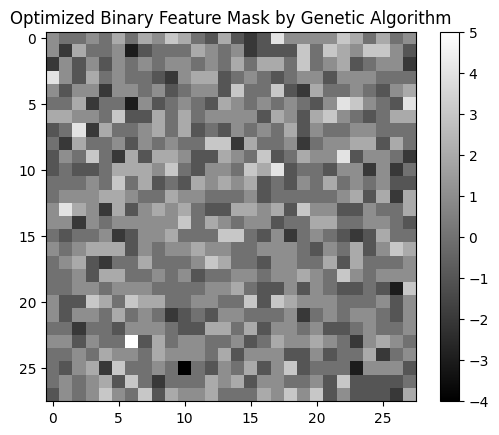


Evaluation on Ambiguous Augmented Digits (GA Improved):
Predicted Labels: [6 2 3 7 2 4 3 4 9 6 5 8]
True Labels: [6 2 3 7 2 2 3 4 7 6 6 9]
[[2 0 1 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 2 0 0 0]
 [0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]]
              precision    recall  f1-score   support

           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         2
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         0
           6       1.00      0.67      0.80         3
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1

    accuracy                           0.67        12
   macro avg       0.56      0.48      0.49        12
weighted avg       0.88      0.67      0.73        12



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


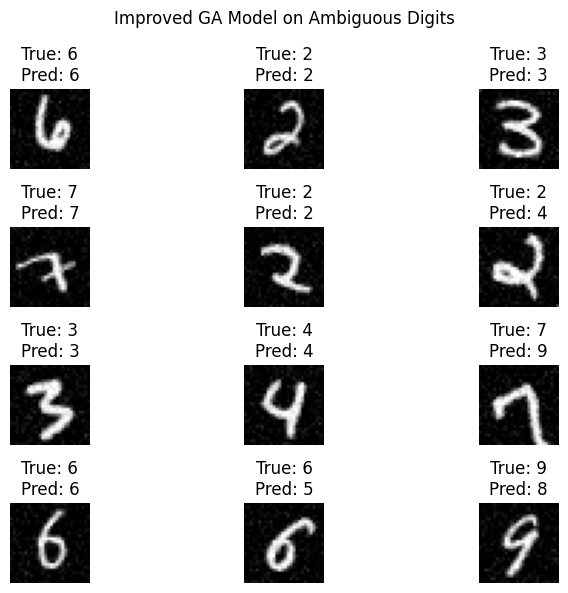

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step

Evaluation on Ambiguous Augmented Digits (Deep Learning Model):
Predicted Labels: [6 2 3 7 2 4 3 4 7 6 5 9]
True Labels: [6 2 3 7 2 2 3 4 7 6 6 9]
[[2 0 1 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 2 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         2
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         0
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1

    accuracy                           0.83        12
   macro avg       0.79      0.76      0.75        12
weighted avg       0.96      0.83      0.87        12



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


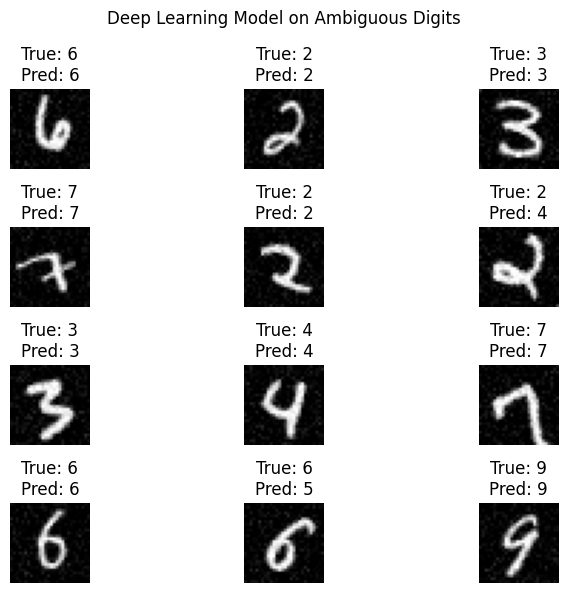

In [10]:
import numpy as np
import pygad
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import cv2

# Load MNIST dataset directly
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess: flatten images and normalize
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# Use larger training set to boost GA performance
x_train_small = x_train[:8000]
y_train_small = y_train[:8000]
x_test_small = x_test[:2000]
y_test_small = y_test[:2000]

# Define fitness function with regularization and higher iterations
def fitness_func(ga_instance, solution, solution_idx):
    binary_mask = np.round(solution)
    selected_features = x_train_small * binary_mask
    clf = LogisticRegression(max_iter=500, solver='liblinear', C=0.5)
    clf.fit(selected_features, y_train_small)

    x_test_masked = x_test_small * binary_mask
    preds = clf.predict(x_test_masked)
    acc = accuracy_score(y_test_small, preds)
    return acc

# Define GA parameters (increased population size and generations)
num_features = 784
ga_instance = pygad.GA(
    num_generations=40,
    sol_per_pop=20,
    num_parents_mating=10,
    num_genes=num_features,
    fitness_func=fitness_func,
    init_range_low=0.0,
    init_range_high=1.0,
    parent_selection_type="rws",
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=20
)

# Run the GA
ga_instance.run()

# Get the best solution
solution, solution_fitness, _ = ga_instance.best_solution()
binary_mask = np.round(solution)
print(f"Improved Binary Feature Mask Accuracy (Fitness): {solution_fitness:.4f}")

plt.imshow(binary_mask.reshape(28, 28), cmap='gray')
plt.title("Optimized Binary Feature Mask by Genetic Algorithm")
plt.colorbar()
plt.show()

# Augmented ambiguous test data
np.random.seed(42)
ambiguous_indexes = np.random.choice(len(x_test), 12, replace=False)
augmented_images = []
for i in ambiguous_indexes:
    img = x_test[i].reshape(28, 28) * 255
    angle = np.random.uniform(-30, 30)
    M = cv2.getRotationMatrix2D((14, 14), angle, 1)
    rotated = cv2.warpAffine(img, M, (28, 28), borderMode=cv2.BORDER_REFLECT)
    noise = np.random.normal(0, 15, (28, 28))
    noisy = rotated + noise
    noisy = np.clip(noisy, 0, 255)
    augmented_images.append(noisy / 255.0)

# Evaluate GA on augmented test samples
augmented_images = np.array(augmented_images).reshape(12, -1)
augmented_masked = augmented_images * binary_mask
clf = LogisticRegression(max_iter=500, solver='liblinear', C=0.5)
clf.fit(x_train_small * binary_mask, y_train_small)
aug_preds = clf.predict(augmented_masked)

print("\nEvaluation on Ambiguous Augmented Digits (GA Improved):")
print("Predicted Labels:", aug_preds)
print("True Labels:", y_test[ambiguous_indexes])
print(confusion_matrix(y_test[ambiguous_indexes], aug_preds))
print(classification_report(y_test[ambiguous_indexes], aug_preds))

plt.figure(figsize=(8, 6))
for i in range(len(augmented_images)):
    plt.subplot(4, 3, i+1)
    plt.imshow(augmented_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[ambiguous_indexes[i]]}\nPred: {aug_preds[i]}")
    plt.axis('off')
plt.suptitle("Improved GA Model on Ambiguous Digits")
plt.tight_layout()
plt.show()

# Deep learning comparison (unchanged)
model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train_small, y_train_small, epochs=10, batch_size=32, verbose=0)
dnn_preds = model.predict(np.array(augmented_images))
dnn_preds_labels = np.argmax(dnn_preds, axis=1)

print("\nEvaluation on Ambiguous Augmented Digits (Deep Learning Model):")
print("Predicted Labels:", dnn_preds_labels)
print("True Labels:", y_test[ambiguous_indexes])
print(confusion_matrix(y_test[ambiguous_indexes], dnn_preds_labels))
print(classification_report(y_test[ambiguous_indexes], dnn_preds_labels))

plt.figure(figsize=(8, 6))
for i in range(len(augmented_images)):
    plt.subplot(4, 3, i+1)
    plt.imshow(augmented_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[ambiguous_indexes[i]]}\nPred: {dnn_preds_labels[i]}")
    plt.axis('off')
plt.suptitle("Deep Learning Model on Ambiguous Digits")
plt.tight_layout()
plt.show()

# GA + CNN

GA+CNN Optimized Feature Mask Accuracy (Fitness): 0.9250


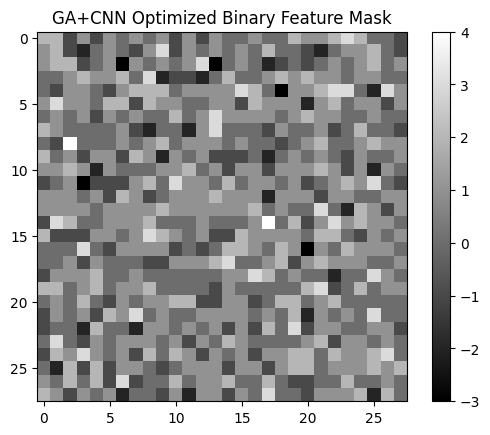

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step

Evaluation on Ambiguous Digits (GA+CNN Model):
Predicted Labels: [6 2 3 9 2 4 3 4 7 6 5 9]
True Labels: [6 2 3 7 2 2 3 4 7 6 6 9]
[[2 0 1 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 2 0 0]
 [0 0 0 0 0 1 1]
 [0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         2
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         0
           6       1.00      0.67      0.80         3
           7       1.00      0.50      0.67         2
           9       0.50      1.00      0.67         1

    accuracy                           0.75        12
   macro avg       0.71      0.69      0.66        12
weighted avg       0.92      0.75      0.79        12



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


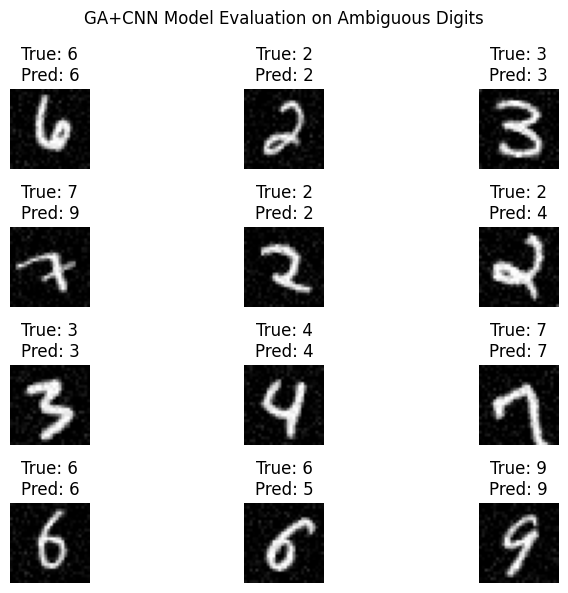

In [11]:
import numpy as np
import pygad
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.optimizers import Adam
import cv2

# Load MNIST dataset directly
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Use larger training set to boost GA performance
x_train_small = x_train[:8000]
y_train_small = y_train[:8000]
x_test_small = x_test[:2000]
y_test_small = y_test[:2000]

# Define fitness function using GA + CNN
def fitness_func(ga_instance, solution, solution_idx):
    binary_mask = np.round(solution).reshape(28, 28)
    masked_train = x_train_small * binary_mask[np.newaxis, :, :, np.newaxis]
    masked_test = x_test_small * binary_mask[np.newaxis, :, :, np.newaxis]

    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(masked_train, y_train_small, epochs=3, batch_size=32, verbose=0)
    _, acc = model.evaluate(masked_test, y_test_small, verbose=0)
    return acc

# Define GA parameters
num_features = 784
ga_instance = pygad.GA(
    num_generations=30,
    sol_per_pop=10,
    num_parents_mating=5,
    num_genes=num_features,
    fitness_func=fitness_func,
    init_range_low=0.0,
    init_range_high=1.0,
    parent_selection_type="rws",
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=20
)

# Run the GA
ga_instance.run()

# Get the best solution
solution, solution_fitness, _ = ga_instance.best_solution()
binary_mask = np.round(solution).reshape(28, 28)
print(f"GA+CNN Optimized Feature Mask Accuracy (Fitness): {solution_fitness:.4f}")

plt.imshow(binary_mask, cmap='gray')
plt.title("GA+CNN Optimized Binary Feature Mask")
plt.colorbar()
plt.show()

# Augment ambiguous test data
np.random.seed(42)
ambiguous_indexes = np.random.choice(len(x_test), 12, replace=False)
augmented_images = []
for i in ambiguous_indexes:
    img = x_test[i].reshape(28, 28) * 255
    angle = np.random.uniform(-30, 30)
    M = cv2.getRotationMatrix2D((14, 14), angle, 1)
    rotated = cv2.warpAffine(img, M, (28, 28), borderMode=cv2.BORDER_REFLECT)
    noise = np.random.normal(0, 15, (28, 28))
    noisy = rotated + noise
    noisy = np.clip(noisy, 0, 255)
    augmented_images.append(noisy / 255.0)

# Evaluate GA+CNN on augmented samples
augmented_images = np.array(augmented_images).reshape(12, 28, 28, 1)
augmented_masked = augmented_images * binary_mask[np.newaxis, :, :, np.newaxis]
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_small * binary_mask[np.newaxis, :, :, np.newaxis], y_train_small, epochs=5, batch_size=32, verbose=0)
dnn_preds = model.predict(augmented_masked)
dnn_preds_labels = np.argmax(dnn_preds, axis=1)

print("\nEvaluation on Ambiguous Digits (GA+CNN Model):")
print("Predicted Labels:", dnn_preds_labels)
print("True Labels:", y_test[ambiguous_indexes])
print(confusion_matrix(y_test[ambiguous_indexes], dnn_preds_labels))
print(classification_report(y_test[ambiguous_indexes], dnn_preds_labels))

plt.figure(figsize=(8, 6))
for i in range(len(augmented_images)):
    plt.subplot(4, 3, i+1)
    plt.imshow(augmented_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[ambiguous_indexes[i]]}\nPred: {dnn_preds_labels[i]}")
    plt.axis('off')
plt.suptitle("GA+CNN Model Evaluation on Ambiguous Digits")
plt.tight_layout()
plt.show()